# Predictive Analysis For Distribution Bussines

### --> The dataset contains information about the sales transactions of a distribution company, including 
#### Date of transaction
#### Customer code
#### Address of customer
#### Item code
#### Name of the items
#### Original price per carton
#### Number of cartons ordered
#### Total pieces ordered
#### Total discount applied to the order

In [578]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [579]:
df = pd.read_csv("distribution_business.csv")
df.head(15)

,INV,INVOICE,C/CODE,CUSTOMER NAME,CUSTOMER ADDRESS,ITEM,ITEMS NAME,CTN RATE,QUANTITY,Unnamed: 9,T/O,NET VALUE
0,#,DATE,NaN,NAME,NaN,CODE,NaN,NaN,CTN,PCS,NaN,NaN
1,3,10-Sep-21,9295.0,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500.0,1,0,1000.0,13500.0
2,3,10-Sep-21,9295.0,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250.0,0,5,375.0,9250.0
3,4,10-Sep-21,8992.0,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500.0,0,2,200.0,2700.0
4,4,10-Sep-21,8992.0,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250.0,0,2,150.0,3700.0
5,5,10-Sep-21,9903.0,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500.0,0,2,200.0,2700.0
6,5,10-Sep-21,9903.0,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250.0,0,2,150.0,3700.0
7,6,11-Sep-21,6544.0,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150.0,0,4,0.0,1240.0
8,6,11-Sep-21,6544.0,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425.0,0,6,0.0,2070.0
9,6,11-Sep-21,6544.0,CHATRAL,CAMPUS,1762,DEEN'S PIZZA CHEESE 200GM,24050.0,0,2,0.0,740.0


In [580]:
df = pd.read_csv('distribution_business.csv',header=1,names=["No","Date","C/code","Customer_name","Customer_address","Item_code","Product_name","Orignal_price","CTN","PCS","Total_discount","Discount_price"],parse_dates=["Date"])
df.head()

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,0,1000,13500.0
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0


In [581]:
min_rows = df.nsmallest(11, ['Discount_price'])
df = df.drop(min_rows.index)

In [582]:
print(df["Product_name"].unique())

["DEEN'S CHADDER CHEESE BLOCK 2K" "DEEN'S MOZRELLA CHEESE BLOCK"
 "DEEN'S CHEDDAR 200GM" "DEEN'S MOZARELLA 200GM"
 "DEEN'S PIZZA CHEESE 200GM" "DEEN'S SLICE CHEESE 200GM"
 "DEEN'S CHEDDAR 400GM" "DEEN'S MOZARELLA 400GM"
 "DEEN'S SLICE CHEESE 1 KG" 'w4-Dyh SLICE CHEESE 1 KG'
 'DEEN SLICE CHEESE 1 KG' 'DEENS CHADDER 140G' 'DEENS CHADDER 907G'
 'DEENS MOZRELLA 140G' 'DEENS PIZZA 400G' 'DEENS SLICE 250G']


In [583]:
print(df["CTN"].value_counts())

0     6973
1      125
5       43
2       41
4       27
10      20
3       19
6       16
7       12
8        7
12       1
Name: CTN, dtype: int64


In [584]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 1), 'PCS'] = 10
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 1), 'PCS'] = 10
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 1), 'PCS'] = 72
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 1), 'PCS'] = 72
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 1), 'PCS'] = 72
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 1), 'PCS'] = 80
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 1), 'PCS'] = 36
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 1), 'PCS'] = 36
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 1), 'PCS'] = 16
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 1), 'PCS'] = 16
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 1), 'PCS'] = 16
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 1), 'PCS'] = 102
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 1), 'PCS'] = 18
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 1), 'PCS'] = 102
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 1), 'PCS'] = 36
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 1), 'PCS'] = 66

In [585]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 2), 'PCS'] = 10*2
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 2), 'PCS'] = 10*2
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 2), 'PCS'] = 72*2
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 2), 'PCS'] = 72*2
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 2), 'PCS'] = 72*2
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 2), 'PCS'] = 80*2
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 2), 'PCS'] = 36*2
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 2), 'PCS'] = 36*2
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 2), 'PCS'] = 16*2
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 2), 'PCS'] = 16*2
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 2), 'PCS'] = 16*2
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 2), 'PCS'] = 102*2
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 2), 'PCS'] = 18*2
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 2), 'PCS'] = 102*2
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 2), 'PCS'] = 36*2
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 2), 'PCS'] = 66*2

In [586]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 3), 'PCS'] = 10*3
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 3), 'PCS'] = 10*3
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 3), 'PCS'] = 72*3
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 3), 'PCS'] = 72*3
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 3), 'PCS'] = 72*3
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 3), 'PCS'] = 80*3
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 3), 'PCS'] = 36*3
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 3), 'PCS'] = 36*3
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 3), 'PCS'] = 16*3
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 3), 'PCS'] = 16*3
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 3), 'PCS'] = 16*3
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 3), 'PCS'] = 102*3
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 3), 'PCS'] = 18*3
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 3), 'PCS'] = 102*3
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 3), 'PCS'] = 36*3
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 3), 'PCS'] = 66*3

In [587]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 4), 'PCS'] = 10*4
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 4), 'PCS'] = 10*4
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 4), 'PCS'] = 72*4
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 4), 'PCS'] = 72*4
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 4), 'PCS'] = 72*4
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 4), 'PCS'] = 80*4
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 4), 'PCS'] = 36*4
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 4), 'PCS'] = 36*4
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 4), 'PCS'] = 16*4
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 4), 'PCS'] = 16*4
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 4), 'PCS'] = 16*4
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 4), 'PCS'] = 102*4
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 4), 'PCS'] = 18*4
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 4), 'PCS'] = 102*4
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 4), 'PCS'] = 36*4
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 4), 'PCS'] = 66*4

In [588]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 5), 'PCS'] = 10*5
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 5), 'PCS'] = 10*5
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 5), 'PCS'] = 72*5
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 5), 'PCS'] = 72*5
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 5), 'PCS'] = 72*5
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 5), 'PCS'] = 80*5
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 5), 'PCS'] = 36*5
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 5), 'PCS'] = 36*5
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 5), 'PCS'] = 16*5
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 5), 'PCS'] = 16*5
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 5), 'PCS'] = 16*5
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 5), 'PCS'] = 102*5
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 5), 'PCS'] = 18*5
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 5), 'PCS'] = 102*5
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 5), 'PCS'] = 36*5
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 5), 'PCS'] = 66*5

In [589]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 6), 'PCS'] = 10*6
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 6), 'PCS'] = 10*6
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 6), 'PCS'] = 72*6
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 6), 'PCS'] = 72*6
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 6), 'PCS'] = 72*6
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 6), 'PCS'] = 80*6
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 6), 'PCS'] = 36*6
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 6), 'PCS'] = 36*6
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 6), 'PCS'] = 16*6
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 6), 'PCS'] = 16*6
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 6), 'PCS'] = 16*6
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 6), 'PCS'] = 102*6
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 6), 'PCS'] = 18*6
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 1), 'PCS'] = 102*6
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 6), 'PCS'] = 36*6
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 6), 'PCS'] = 66*6

In [590]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 7), 'PCS'] = 10*7
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 7), 'PCS'] = 10*7
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 7), 'PCS'] = 72*7
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 7), 'PCS'] = 72*7
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 7), 'PCS'] = 72*7
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 7), 'PCS'] = 80*7
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 7), 'PCS'] = 36*7
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 7), 'PCS'] = 36*7
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 7), 'PCS'] = 16*7
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 7), 'PCS'] = 16*7
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 7), 'PCS'] = 16*7
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 7), 'PCS'] = 102*7
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 7), 'PCS'] = 18*7
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 1), 'PCS'] = 102*7
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 7), 'PCS'] = 36*7
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 7), 'PCS'] = 66*7

In [591]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 8), 'PCS'] = 10*8
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 8), 'PCS'] = 10*8
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 8), 'PCS'] = 72*8
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 8), 'PCS'] = 72*8
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 8), 'PCS'] = 72*8
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 8), 'PCS'] = 80*8
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 8), 'PCS'] = 36*8
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 8), 'PCS'] = 36*8
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 8), 'PCS'] = 16*8
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 8), 'PCS'] = 16*8
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 8), 'PCS'] = 16*8
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 8), 'PCS'] = 102*8
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 8), 'PCS'] = 18*8
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 8), 'PCS'] = 102*8
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 8), 'PCS'] = 36*8
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 8), 'PCS'] = 66*8

In [592]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 10), 'PCS'] = 10*10
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 10), 'PCS'] = 10*10
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 10), 'PCS'] = 72*10
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 10), 'PCS'] = 72*10
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 10), 'PCS'] = 72*10
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 10), 'PCS'] = 80*10
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 10), 'PCS'] = 36*10
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 10), 'PCS'] = 36*10
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 10), 'PCS'] = 16*10
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 10), 'PCS'] = 16*10
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 10), 'PCS'] = 16*10
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 10), 'PCS'] = 102*10
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 10), 'PCS'] = 18*10
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 10), 'PCS'] = 102*10
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 10), 'PCS'] = 36*10
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 10), 'PCS'] = 66*10

In [593]:
df.loc[(df['Product_name'] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df['CTN'] == 12), 'PCS'] = 10*12
df.loc[(df['Product_name'] == "DEEN'S MOZRELLA CHEESE BLOCK") & (df['CTN'] == 12), 'PCS'] = 10*12
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 200GM") & (df['CTN'] == 12), 'PCS'] = 72*12
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 200GM") & (df['CTN'] == 12), 'PCS'] = 72*12
df.loc[(df['Product_name'] == "DEEN'S PIZZA CHEESE 200GM") & (df['CTN'] == 12), 'PCS'] = 72*12
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 200GM") & (df['CTN'] == 12), 'PCS'] = 80*12
df.loc[(df['Product_name'] == "DEEN'S CHEDDAR 400GM") & (df['CTN'] == 12), 'PCS'] = 36*12
df.loc[(df['Product_name'] == "DEEN'S MOZARELLA 400GM") & (df['CTN'] == 12), 'PCS'] = 36*12
df.loc[(df['Product_name'] == "DEEN'S SLICE CHEESE 1 KG") & (df['CTN'] == 12), 'PCS'] = 16*12
df.loc[(df['Product_name'] == "w4-Dyh SLICE CHEESE 1 KG") & (df['CTN'] == 12), 'PCS'] = 16*12
df.loc[(df['Product_name'] == "DEEN SLICE CHEESE 1 KG") & (df['CTN'] == 12), 'PCS'] = 16*12
df.loc[(df['Product_name'] == "DEENS CHADDER 140G") & (df['CTN'] == 12), 'PCS'] = 102*12
df.loc[(df['Product_name'] == "DEENS CHADDER 907G") & (df['CTN'] == 12), 'PCS'] = 18*12
df.loc[(df['Product_name'] == "DEENS MOZRELLA 140G") & (df['CTN'] == 12), 'PCS'] = 102*12
df.loc[(df['Product_name'] == "DEENS PIZZA 400G") & (df['CTN'] == 12), 'PCS'] = 36*12
df.loc[(df['Product_name'] == "DEENS SLICE 250G") & (df['CTN'] == 12), 'PCS'] = 66*12

In [594]:
# Define a function to get the number of pieces in one carton based on the product name
def get_pcs_in_ctn(product_name):
    if "DEEN'S CHADDER CHEESE BLOCK 2K" in product_name:
        return 10  
    elif "DEEN'S MOZRELLA CHEESE BLOCK" in product_name:
        return 10
    elif "DEEN'S CHEDDAR 200GM" in product_name:
        return 72 
    elif "DEEN'S MOZARELLA 200GM" in product_name:
        return 72
    elif "DEEN'S PIZZA CHEESE 200GM" in product_name:
        return 72
    elif "DEEN'S SLICE CHEESE 200GM" in product_name:
        return 80
    elif "400G" in product_name:
        return 36
    elif "1 KG" in product_name:
        return 16
    elif "140G" in product_name:
        return 102
    elif "DEENS CHADDER 907G" in product_name:
        return 18
    elif "DEENS SLICE 250G" in product_name:
        return 66
    else:
        return 0  # Return 0 if the product name doesn't match any known pattern

# Add a new column 'PCS_in_CTN' based on the 'Product_name' column
df['PCS_in_CTN'] = df['Product_name'].apply(get_pcs_in_ctn)

In [595]:
# create a new column called "Price_per_CTN" by dividing "Orignal_price" by "PCS_in_CTN"
df['Price_per_PCS'] = df['Orignal_price'] / df['PCS_in_CTN']

In [596]:
df.head(10)

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500.0,10,1450.000000
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0,10,1925.000000
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000
5,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000
6,6,2021-09-11,6544,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150,0,4,0,1240.0,72,279.861111
7,6,2021-09-11,6544,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425,0,6,0,2070.0,72,311.458333
8,6,2021-09-11,6544,CHATRAL,CAMPUS,1762,DEEN'S PIZZA CHEESE 200GM,24050,0,2,0,740.0,72,334.027778
9,6,2021-09-11,6544,CHATRAL,CAMPUS,1763,DEEN'S SLICE CHEESE 200GM,23600,0,2,0,590.0,80,295.000000


In [597]:
df = df[df['Discount_price'] <= 160000]

In [598]:
print(df["Product_name"].unique())

["DEEN'S CHADDER CHEESE BLOCK 2K" "DEEN'S MOZRELLA CHEESE BLOCK"
 "DEEN'S CHEDDAR 200GM" "DEEN'S MOZARELLA 200GM"
 "DEEN'S PIZZA CHEESE 200GM" "DEEN'S SLICE CHEESE 200GM"
 "DEEN'S CHEDDAR 400GM" "DEEN'S MOZARELLA 400GM"
 "DEEN'S SLICE CHEESE 1 KG" 'w4-Dyh SLICE CHEESE 1 KG'
 'DEEN SLICE CHEESE 1 KG' 'DEENS CHADDER 140G' 'DEENS CHADDER 907G'
 'DEENS MOZRELLA 140G' 'DEENS PIZZA 400G' 'DEENS SLICE 250G']


In [599]:
count_10 = (df['PCS'] == 10).sum()
print(f"There are {count_10} rows with a value of 10 in the 'PCS' column.")

There are 128 rows with a value of 10 in the 'PCS' column.


In [600]:
df.head(30)

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500.0,10,1450.000000
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0,10,1925.000000
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000
5,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000
6,6,2021-09-11,6544,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150,0,4,0,1240.0,72,279.861111
7,6,2021-09-11,6544,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425,0,6,0,2070.0,72,311.458333
8,6,2021-09-11,6544,CHATRAL,CAMPUS,1762,DEEN'S PIZZA CHEESE 200GM,24050,0,2,0,740.0,72,334.027778
9,6,2021-09-11,6544,CHATRAL,CAMPUS,1763,DEEN'S SLICE CHEESE 200GM,23600,0,2,0,590.0,80,295.000000


In [601]:
df.to_csv('my_dataframe.csv', index=False)

In [602]:
# Creating a new feature 'Discount_per_piece'
df['Discount_per_piece'] = df['Total_discount'] / df['PCS']

In [603]:
# Creating a new feature 'Month'
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [604]:
# Define the bin edges for the price ranges
bins = [0, 53333.33, 106666.66, 160000.0]

# Define the labels for each bin
labels = ["Low", "Medium", "High"]

# Use the pandas cut() function to create a new column with the binned values
df["Price Range"] = pd.cut(df["Discount_price"], bins=bins, labels=labels)

In [605]:
df["Has_Discount"] = (df["Total_discount"] > 0).astype(int)

In [606]:
df.head(20)

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500.0,10,1450.000000,100.000000,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0,10,1925.000000,75.000000,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000,100.000000,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000,75.000000,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.000000,100.000000,9,Low,1
5,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.000000,75.000000,9,Low,1
6,6,2021-09-11,6544,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150,0,4,0,1240.0,72,279.861111,0.000000,9,Low,0
7,6,2021-09-11,6544,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425,0,6,0,2070.0,72,311.458333,0.000000,9,Low,0
8,6,2021-09-11,6544,CHATRAL,CAMPUS,1762,DEEN'S PIZZA CHEESE 200GM,24050,0,2,0,740.0,72,334.027778,0.000000,9,Low,0
9,6,2021-09-11,6544,CHATRAL,CAMPUS,1763,DEEN'S SLICE CHEESE 200GM,23600,0,2,0,590.0,80,295.000000,0.000000,9,Low,0


In [607]:
df.shape

(7263, 18)

In [608]:
df.isnull().mean()*100

No                    0.000000
Date                  0.000000
C/code                0.000000
Customer_name         0.000000
Customer_address      3.428335
Item_code             0.000000
Product_name          0.000000
Orignal_price         0.000000
CTN                   0.000000
PCS                   0.000000
Total_discount        0.000000
Discount_price        0.000000
PCS_in_CTN            0.000000
Price_per_PCS         0.000000
Discount_per_piece    0.000000
Month                 0.000000
Price Range           0.000000
Has_Discount          0.000000
dtype: float64

In [609]:
df["Customer_address"].isnull().sum()

249

In [610]:
df["Customer_address"].fillna(method="ffill", inplace=True) # forward fill
df["Customer_address"].fillna(method="bfill", inplace=True) # backward fill

In [611]:
df.isnull().sum()

No                    0
Date                  0
C/code                0
Customer_name         0
Customer_address      0
Item_code             0
Product_name          0
Orignal_price         0
CTN                   0
PCS                   0
Total_discount        0
Discount_price        0
PCS_in_CTN            0
Price_per_PCS         0
Discount_per_piece    0
Month                 0
Price Range           0
Has_Discount          0
dtype: int64

In [612]:
df.describe()

,No,C/code,Item_code,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Has_Discount
count,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000
mean,1661.133691,5196.016247,1764.244114,23853.950571,0.114691,4.733443,169.251962,4416.798651,52.473083,853.388929,26.627420,6.892882,0.332783
std,972.647631,3350.389500,5.409659,4828.958824,0.710261,14.687622,807.392044,13858.373187,30.033907,747.334912,52.419782,3.544979,0.471242
min,3.000000,2005.000000,1758.000000,14400.000000,0.000000,1.000000,-120.000000,295.000000,10.000000,279.861111,-60.000000,1.000000,0.000000
25%,815.500000,2136.000000,1760.000000,21180.000000,0.000000,2.000000,0.000000,902.000000,10.000000,334.027778,0.000000,4.000000,0.000000
50%,1676.000000,3403.000000,1763.000000,23725.000000,0.000000,3.000000,0.000000,1485.000000,72.000000,386.000000,0.000000,7.000000,0.000000
75%,2501.000000,9024.000000,1770.000000,26650.000000,0.000000,4.000000,90.000000,2900.000000,72.000000,1590.000000,23.958333,10.000000,1.000000
max,3345.000000,9965.000000,1788.000000,36006.000000,10.000000,714.000000,14000.000000,160000.000000,102.000000,2585.000000,901.000000,12.000000,1.000000


## EDA


In [613]:
# pip install pandas_profiling 

In [614]:
# import pandas_profiling

# # Generate report
# profile = pandas_profiling.ProfileReport(df)

# # Save report as HTML file
# profile.to_file("report.html")

In [615]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 7263
Number of columns: 18


In [616]:
print(df.dtypes)

No                             int64
Date                  datetime64[ns]
C/code                         int64
Customer_name                 object
Customer_address              object
Item_code                      int64
Product_name                  object
Orignal_price                  int64
CTN                            int64
PCS                            int64
Total_discount                 int64
Discount_price               float64
PCS_in_CTN                     int64
Price_per_PCS                float64
Discount_per_piece           float64
Month                          int64
Price Range                 category
Has_Discount                   int32
dtype: object


In [617]:
df.duplicated().sum()

2

In [618]:
print(df.nunique())


No                    3295
Date                   372
C/code                 221
Customer_name          214
Customer_address       131
Item_code               14
Product_name            16
Orignal_price           43
CTN                     10
PCS                     35
Total_discount         334
Discount_price         724
PCS_in_CTN               8
Price_per_PCS           43
Discount_per_piece     254
Month                   12
Price Range              3
Has_Discount             2
dtype: int64


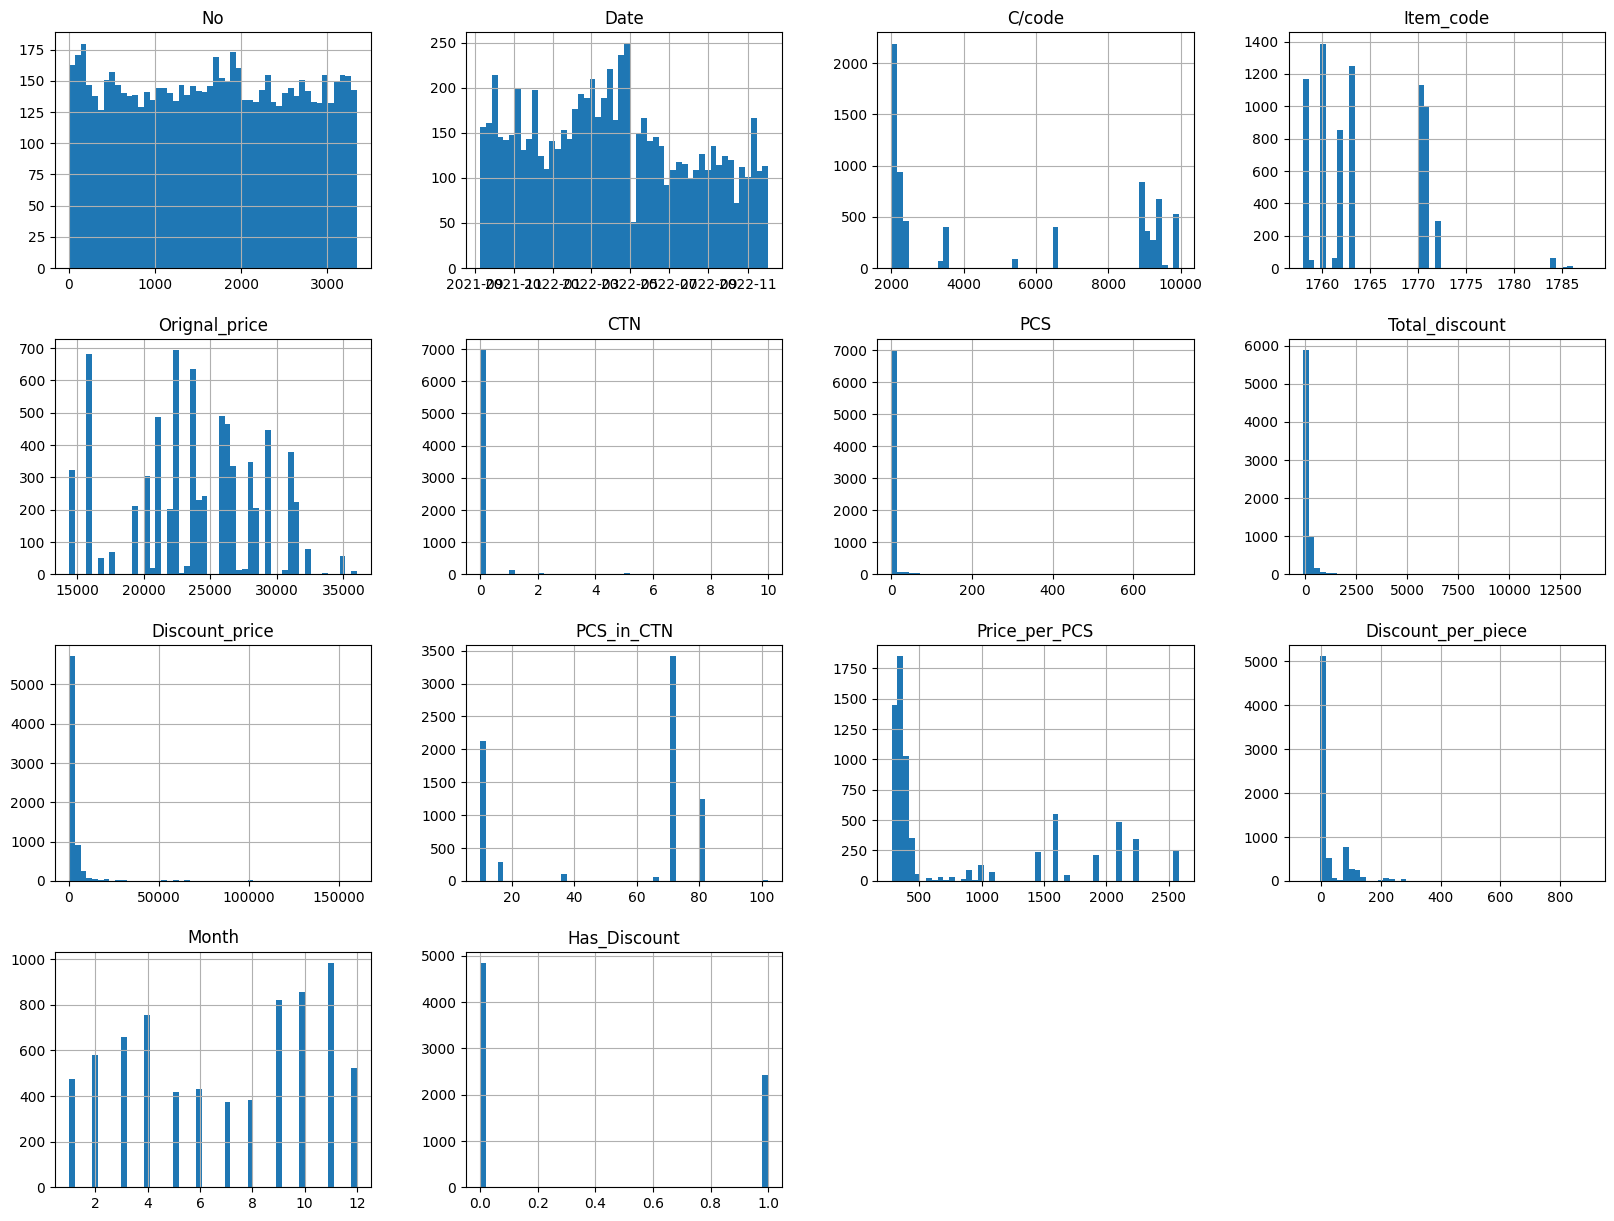

In [619]:
# distribution of the numerical columns
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()


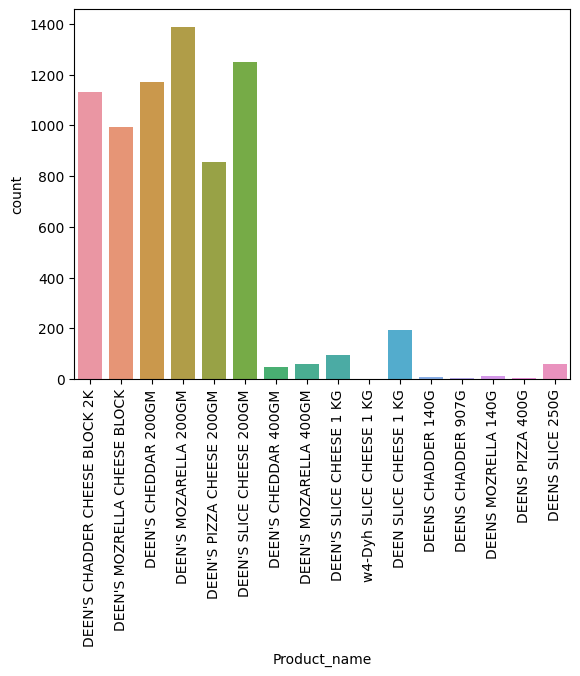

In [620]:
# distribution of the categorical columns
import seaborn as sns

sns.countplot(x='Product_name', data=df)
plt.xticks(rotation=90)
plt.show()


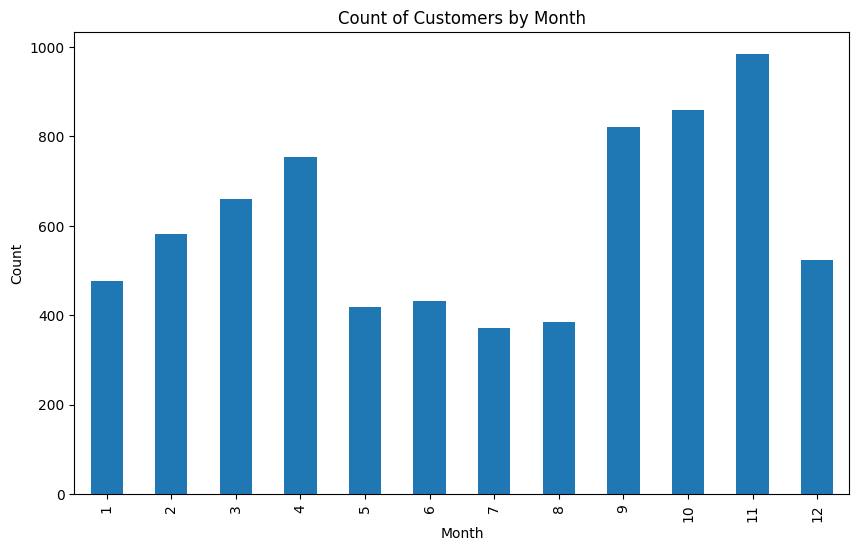

In [621]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

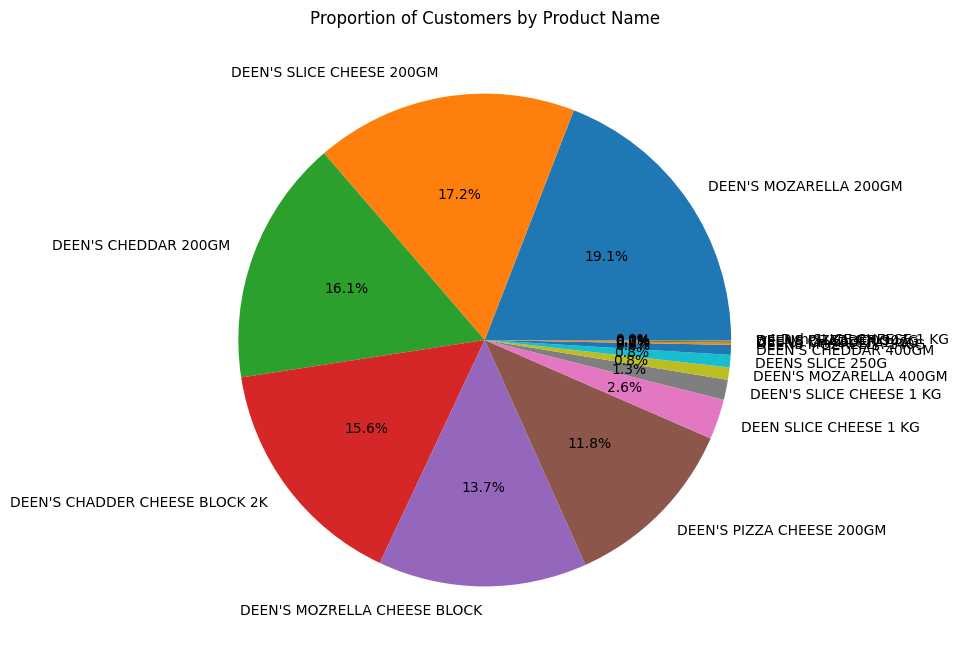

In [622]:
plt.figure(figsize=(8, 8))
df['Product_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Customers by Product Name')
plt.ylabel('')
plt.show()

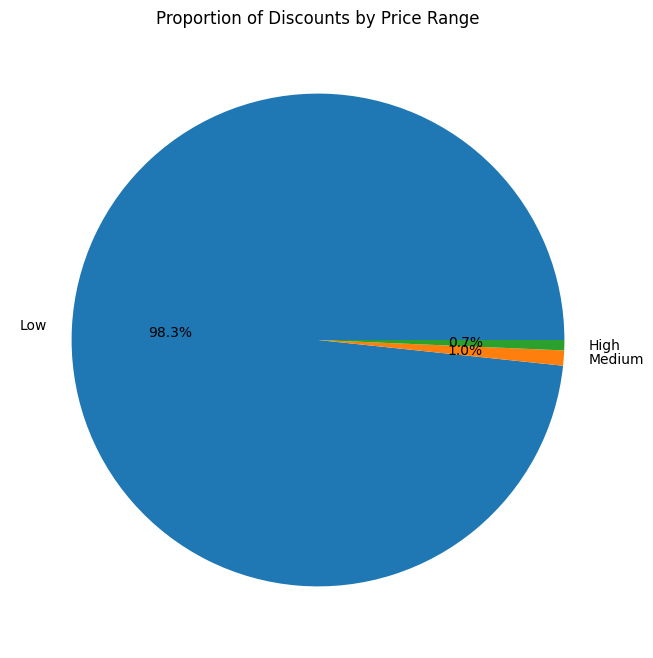

In [623]:
plt.figure(figsize=(8, 8))
df['Price Range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Discounts by Price Range')
plt.ylabel('')
plt.show()

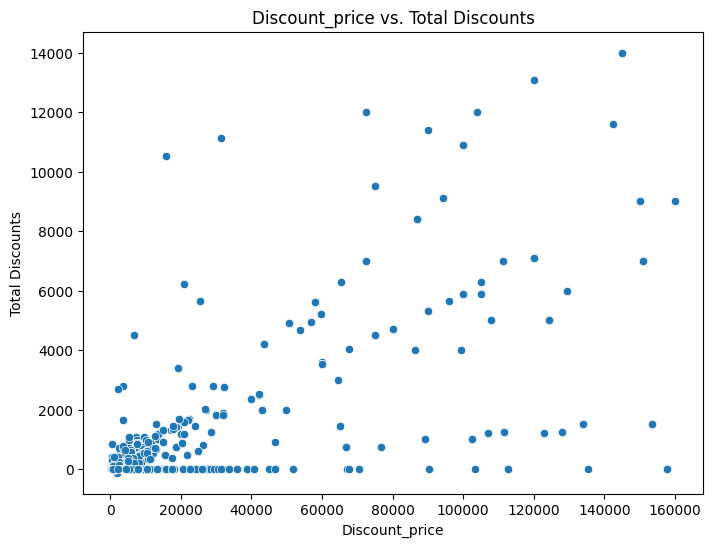

In [624]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount_price', y='Total_discount')
plt.title('Discount_price vs. Total Discounts')
plt.xlabel('Discount_price')
plt.ylabel('Total Discounts')
plt.show()

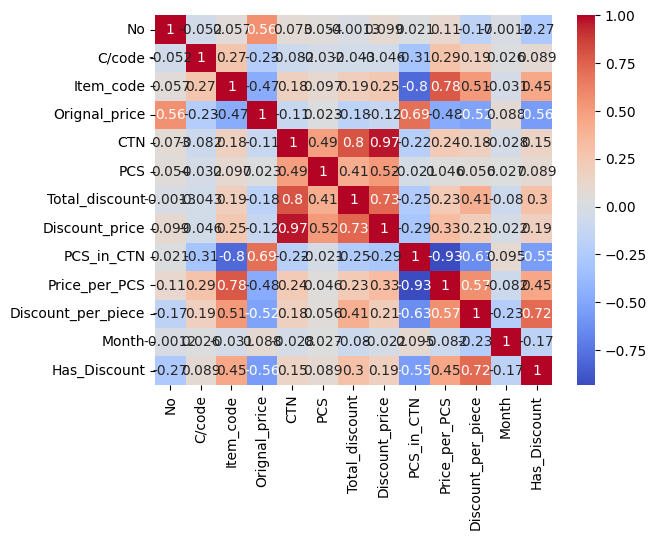

In [625]:
 # correlation between the numerical columns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [626]:
# Q1 = df['Discount_price'].quantile(0.25)
# Q3 = df['Discount_price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

# df = df[(df['Discount_price'] >= lower_limit) & (df['Discount_price'] <= upper_limit)]

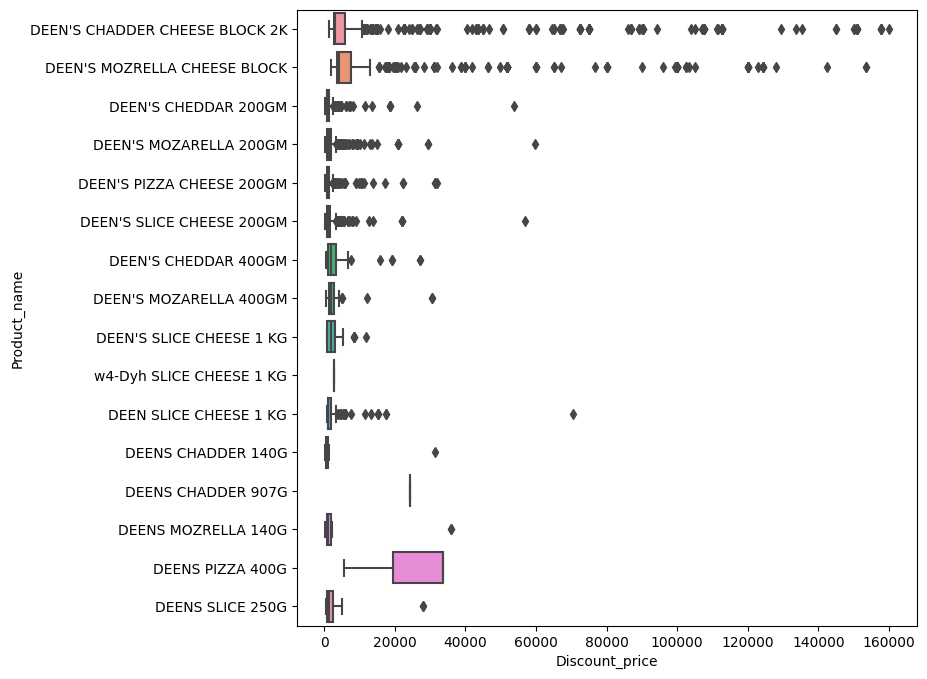

In [627]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y="Product_name", x="Discount_price")
plt.show()

In [628]:
df[(df["Product_name"] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df["Discount_price"]>50000)]

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
1806,806,2021-12-20,2028,INSAF S/S 0302.8887997,Phase 3 Chowk,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,8,80,12000,104000.0,10,1450.0,150.00,12,Medium,1
2620,1196,2022-02-09,3449,JAN'S DAILY,TOWN,1770,DEEN'S CHADDER CHEESE BLOCK 2K,15900,4,40,3600,60000.0,10,1590.0,90.00,2,Medium,1
2693,1233,2022-02-14,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,15900,4,40,3600,60000.0,10,1590.0,90.00,2,Medium,1
2798,1283,2022-02-17,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,15900,4,40,4050,67500.0,10,1590.0,101.25,2,Medium,1
2927,1344,2022-02-24,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,15900,6,60,8400,87000.0,10,1590.0,140.00,2,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6683,3079,2022-10-20,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,22550,7,70,0,157850.0,10,2255.0,0.00,10,High,0
6926,3182,2022-11-07,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,22550,7,70,0,157850.0,10,2255.0,0.00,11,High,0
7065,3237,2022-11-15,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,22550,5,50,0,112750.0,10,2255.0,0.00,11,High,0
7103,3258,2022-11-21,2069,CHIEF BURGER,UNIVERSITY ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,22550,5,50,0,112750.0,10,2255.0,0.00,11,High,0


In [629]:
df.head()

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500.0,10,1450.0,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250.0,10,1925.0,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.0,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700.0,10,1925.0,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700.0,10,1450.0,100.0,9,Low,1


In [630]:
df['Discount_price'] = df['Discount_price'].astype("int64")

In [631]:
df.dtypes

No                             int64
Date                  datetime64[ns]
C/code                         int64
Customer_name                 object
Customer_address              object
Item_code                      int64
Product_name                  object
Orignal_price                  int64
CTN                            int64
PCS                            int64
Total_discount                 int64
Discount_price                 int64
PCS_in_CTN                     int64
Price_per_PCS                float64
Discount_per_piece           float64
Month                          int64
Price Range                 category
Has_Discount                   int32
dtype: object

In [632]:
df.head()

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500,10,1450.0,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250,10,1925.0,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.0,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1


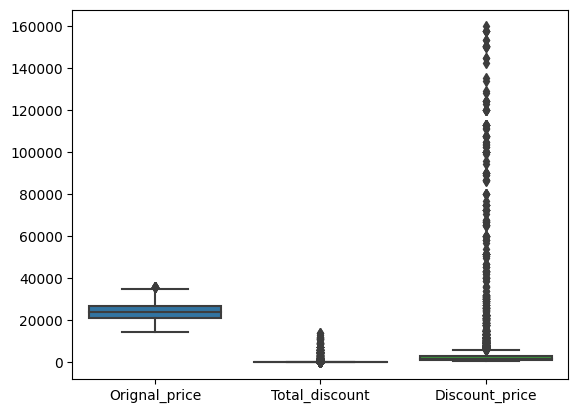

In [633]:
# Check for outliers using box plot
sns.boxplot(data=df[["Orignal_price", "Total_discount", "Discount_price"]])
plt.show()


In [634]:
# Remove row 6020
# Remove row 7023
# Remove row 5088
# df = df.drop(6902)
# df = df.drop(7023)
# df = df.drop(5088)

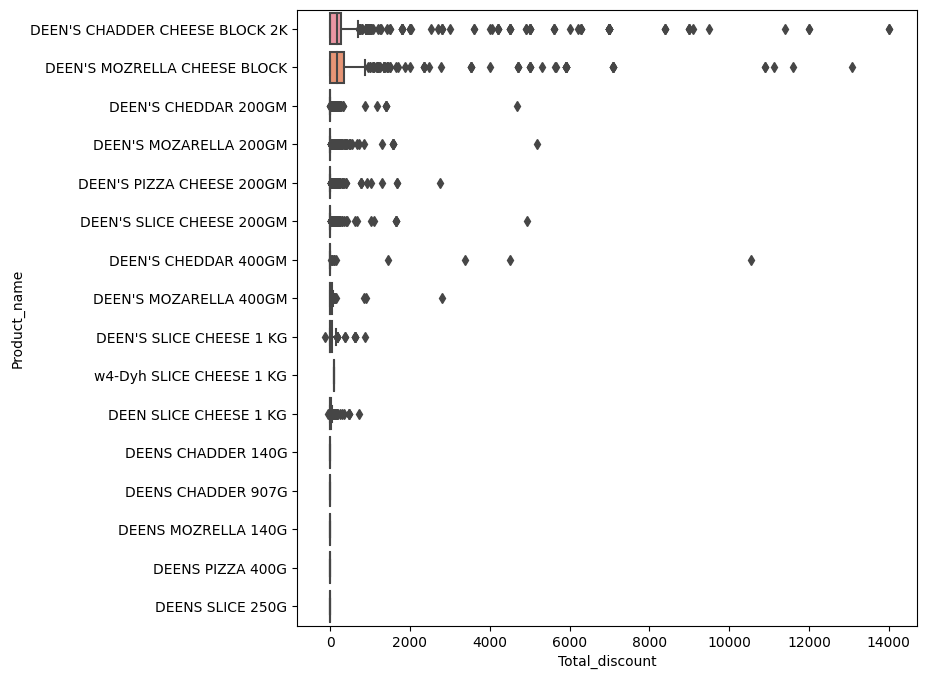

In [635]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, y="Product_name", x="Total_discount")
plt.show()

In [636]:
df[(df["Product_name"] == "DEEN'S CHADDER CHEESE BLOCK 2K") & (df["Total_discount"]>20000)]

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount


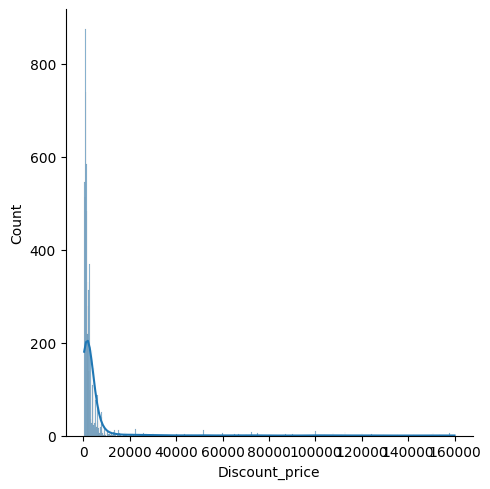

In [637]:
sns.displot(df['Discount_price'], kde=True)

Binning 
Sales forcasting
Mapping according to Coutomer address
Predictive analysis
modeling 
accuracy
deployment
Motinoring

In [638]:
df["Customer_name"].value_counts()

PIZZA FLAME        474
SNACK FOOD CAFE    254
AL MAIDA 2         192
ARYANA S/S         177
TOP TOWN           155
                  ... 
SMOKE & GRILL        1
MUZAFAR SWEETS       1
INSAF BAWARCHI       1
H H MART             1
JUICE POINT          1
Name: Customer_name, Length: 214, dtype: int64

In [639]:
# # Handling outliers by removing the records that are beyond 3 standard deviations
# df = df[np.abs(df.Discount_price - df.Discount_price.mean()) <= (3 * df.Discount_price.std())]

In [640]:
count_above_150000 = df[df['Discount_price'] > 160000]['Discount_price'].count()
print(count_above_150000)

0


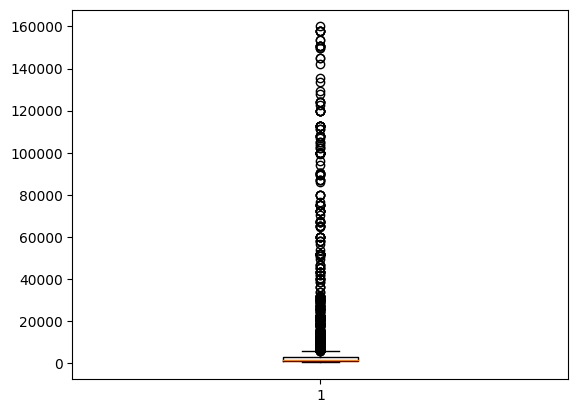

In [641]:
#Check outliers
plt.boxplot(df['Discount_price'])
plt.show()

In [642]:
# # Z-Score method for outliers
# from scipy import stats

# z_scores = stats.zscore(df['Discount_price'])
# print(z_scores)

In [643]:
# # IQR method
# Q1 = df['Discount_price'].quantile(0.25)
# Q3 = df['Discount_price'].quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [644]:
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['Discount_price'] < lower_bound) | (df['Discount_price'] > upper_bound)]
# print(outliers)

In [645]:
from scipy.stats import shapiro

# assuming Discount_price is a pandas Series or numpy array
stat, p = shapiro(df['Discount_price'])

print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.24549037218093872
p-value: 0.0


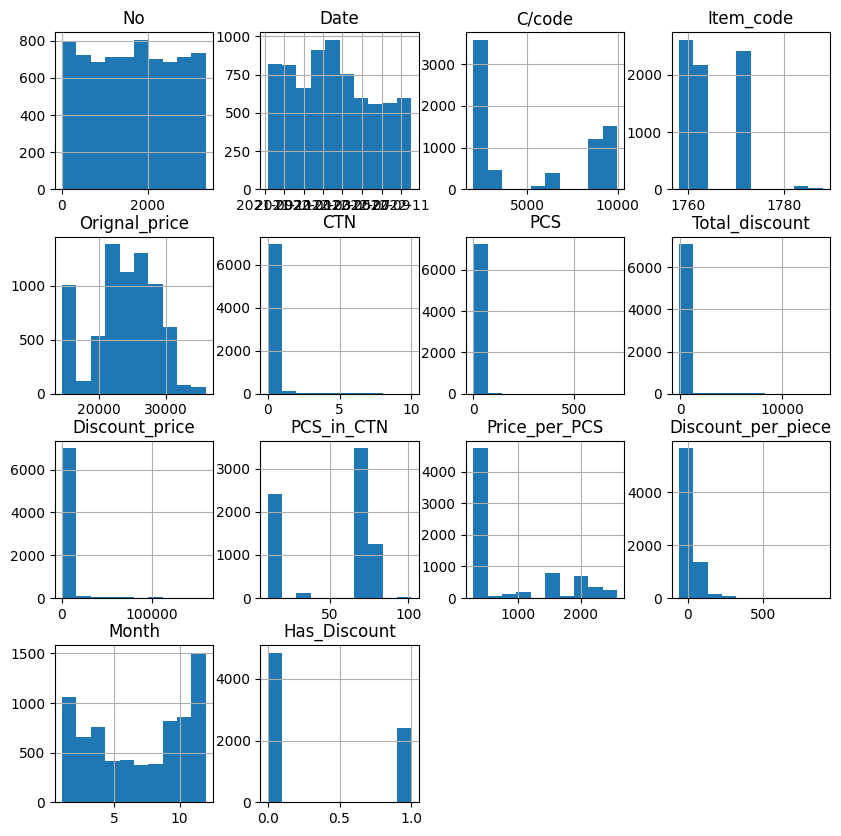

In [646]:
# Visualizing the distribution of the data using histograms
df.hist(figsize=(10,10))
plt.show()

In [647]:
# # Visualizing the relationship between features using scatter plots
# sns.pairplot(df)
# plt.show()

### Get insights from data

In [648]:
# Identify the top-selling products
top_products = df.groupby(['Item_code', 'Product_name'])['PCS'].sum().reset_index().sort_values('PCS', ascending=False).head(10)
print(top_products)


    Item_code                    Product_name   PCS
6        1770  DEEN'S CHADDER CHEESE BLOCK 2K  7420
2        1760          DEEN'S MOZARELLA 200GM  5914
5        1763       DEEN'S SLICE CHEESE 200GM  5442
7        1771    DEEN'S MOZRELLA CHEESE BLOCK  4824
0        1758            DEEN'S CHEDDAR 200GM  4423
4        1762       DEEN'S PIZZA CHEESE 200GM  3001
13       1786             DEENS MOZRELLA 140G  1450
8        1772          DEEN SLICE CHEESE 1 KG   476
11       1784                DEENS SLICE 250G   339
1        1759            DEEN'S CHEDDAR 400GM   320


In [649]:
#Analyze the discounts
discount_analysis = df.groupby('Product_name').agg({'Total_discount': 'mean', 'Discount_price': 'mean', 'PCS': 'sum'}).reset_index()
print(discount_analysis)


                      Product_name  Total_discount  Discount_price   PCS
0           DEEN SLICE CHEESE 1 KG       40.557292     2522.671875   476
1   DEEN'S CHADDER CHEESE BLOCK 2K      539.905393    11593.582670  7420
2             DEEN'S CHEDDAR 200GM       21.489325     1327.908625  4423
3             DEEN'S CHEDDAR 400GM      435.234043     4224.000000   320
4           DEEN'S MOZARELLA 200GM       33.213977     1666.979107  5914
5           DEEN'S MOZARELLA 400GM       94.881356     3236.644068   260
6     DEEN'S MOZRELLA CHEESE BLOCK      454.110553    10581.577889  4824
7        DEEN'S PIZZA CHEESE 200GM       26.612412     1467.234192  3001
8         DEEN'S SLICE CHEESE 1 KG       81.568421     2559.694737   277
9        DEEN'S SLICE CHEESE 200GM       24.925540     1453.208967  5442
10              DEENS CHADDER 140G        0.000000     5087.428571   116
11              DEENS CHADDER 907G        0.000000    24372.000000    36
12             DEENS MOZRELLA 140G        0.000000 

In [650]:
# Identify the most profitable customers
top_customers = df.groupby(['Customer_name', 'Customer_address'])['Discount_price','PCS'].sum().reset_index().sort_values('PCS', ascending=False).head(10)
print(top_customers)


                     Customer_name           Customer_address  Discount_price  \
50                    CHIEF BURGER            UNIVERSITY ROAD        11108875   
126             IMTIAZ SUPER STORE                  RING ROAD          693975   
215                    PIZZA FLAME             IBRAHIM MARKET         2158455   
143                    JAN'S DAILY                       TOWN         1610450   
9             AL HAMRA SUPER STORE                DILZAQ ROAD          320531   
24                      ARYANA S/S               Nawab Market          312446   
100  H.B.K Hypermarket (Pvt.) Ltd.                  ring road          376621   
112                      I B TRDER             IBRAHIM MARKET          211274   
253                SNACK FOOD CAFE              ZANGAL MARKET         1034831   
263                       TOP TOWN  TORANGZAI MARKET HAYATBAD          192666   

      PCS  
50   5543  
126  2321  
215  1258  
143   950  
9     887  
24    811  
100   744  
112   695  


In [651]:
# Analyze the pricing strategy
price_analysis = df.groupby('Product_name').agg({'Orignal_price': 'mean', 'Discount_price': 'mean', 'PCS': 'sum'}).reset_index()
print(price_analysis)


                      Product_name  Orignal_price  Discount_price   PCS
0           DEEN SLICE CHEESE 1 KG   16472.500000     2522.671875   476
1   DEEN'S CHADDER CHEESE BLOCK 2K   17382.493369    11593.582670  7420
2             DEEN'S CHEDDAR 200GM   23537.508967     1327.908625  4423
3             DEEN'S CHEDDAR 400GM   23385.446809     4224.000000   320
4           DEEN'S MOZARELLA 200GM   26294.164265     1666.979107  5914
5           DEEN'S MOZARELLA 400GM   26337.966102     3236.644068   260
6     DEEN'S MOZRELLA CHEESE BLOCK   21996.020101    10581.577889  4824
7        DEEN'S PIZZA CHEESE 200GM   28093.768150     1467.234192  3001
8         DEEN'S SLICE CHEESE 1 KG   14536.421053     2559.694737   277
9        DEEN'S SLICE CHEESE 200GM   27265.332266     1453.208967  5442
10              DEENS CHADDER 140G   31314.000000     5087.428571   116
11              DEENS CHADDER 907G   24372.000000    24372.000000    36
12             DEENS MOZRELLA 140G   36006.000000     7977.80000

In [652]:
#Analyze customer behavior
customer_behavior = df.groupby(['Customer_name', 'Customer_address']).agg({'CTN': 'sum', 'PCS': 'sum'}).reset_index()
customer_behavior['Items_per_carton'] = customer_behavior['PCS'] / customer_behavior['CTN']
print(customer_behavior)


            Customer_name            Customer_address  CTN  PCS  \
0                4 SEASON                       SADAR    0  251   
1              7 SEAZ S S         KHYBER SUPER MARKET    0   23   
2                AD STORE    Colonel Sher Khan Market    0   90   
3               ADNAN G/S                M ZAI MARKET    0   48   
4     ADNAN GENERAL STORE                   ARY BAZAR    0    2   
..                    ...                         ...  ...  ...   
272           WARSAK MALL                 WARSAK ROAD    0   36   
273  YOUNAS GENERAL STORE                  GUL BERG 2    2  398   
274             ZAFAR G/S  HAYATABAD TURANGZAI MARKET    0  256   
275         ZAHID MOHMAND                      NOTHIA    0    1   
276             ZARI MART                     GULBERG    0  211   

     Items_per_carton  
0                 inf  
1                 inf  
2                 inf  
3                 inf  
4                 inf  
..                ...  
272               inf  
273

In [653]:
#Identify correlations
corr_matrix = df[['Orignal_price', 'CTN', 'PCS', 'Total_discount', 'Discount_price']].corr()
print(corr_matrix)


                Orignal_price       CTN       PCS  Total_discount  \
Orignal_price        1.000000 -0.111042  0.022834       -0.183569   
CTN                 -0.111042  1.000000  0.493457        0.802142   
PCS                  0.022834  0.493457  1.000000        0.411243   
Total_discount      -0.183569  0.802142  0.411243        1.000000   
Discount_price      -0.121228  0.965619  0.515604        0.731289   

                Discount_price  
Orignal_price        -0.121228  
CTN                   0.965619  
PCS                   0.515604  
Total_discount        0.731289  
Discount_price        1.000000  


### Vizualization

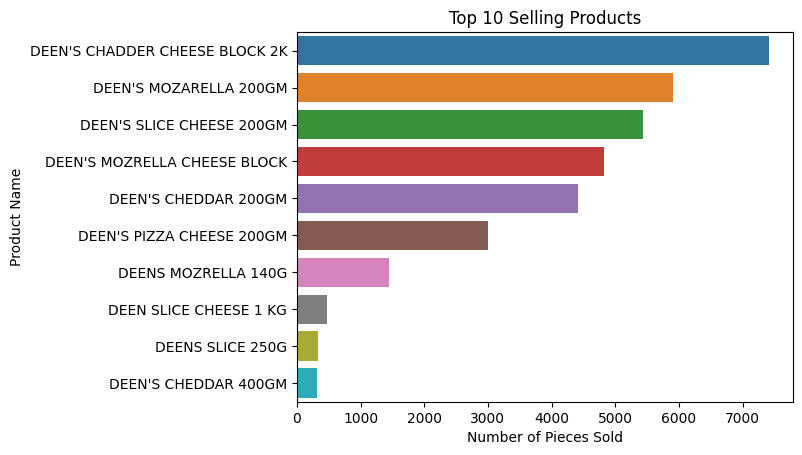

In [654]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = df.groupby(['Item_code', 'Product_name'])['PCS'].sum().reset_index().sort_values('PCS', ascending=False).head(10)

sns.barplot(x='PCS', y='Product_name', data=top_products)
plt.title('Top 10 Selling Products')
plt.xlabel('Number of Pieces Sold')
plt.ylabel('Product Name')
plt.show()


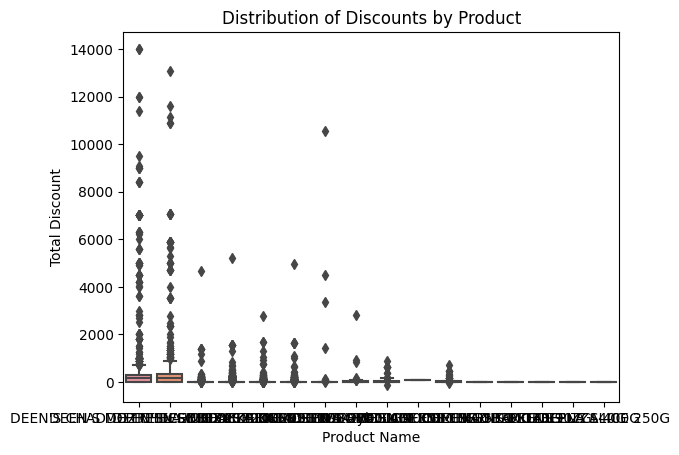

In [655]:
sns.boxplot(x='Product_name', y='Total_discount', data=df)
plt.title('Distribution of Discounts by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Discount')
plt.show()


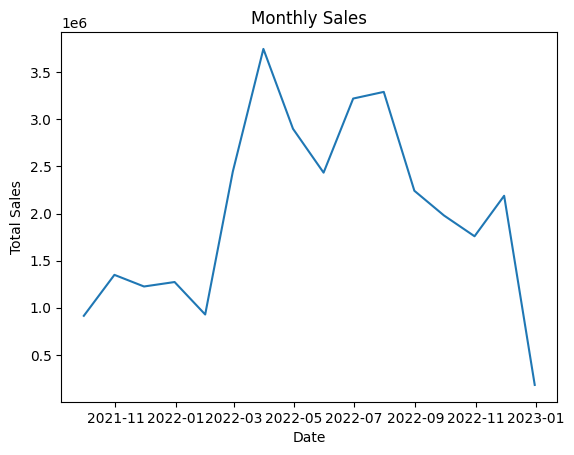

In [656]:
# Line plot to show sales over time
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Discount_price': 'sum'}).reset_index()

sns.lineplot(x='Date', y='Discount_price', data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [657]:
df.head()

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500,10,1450.0,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250,10,1925.0,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.0,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1


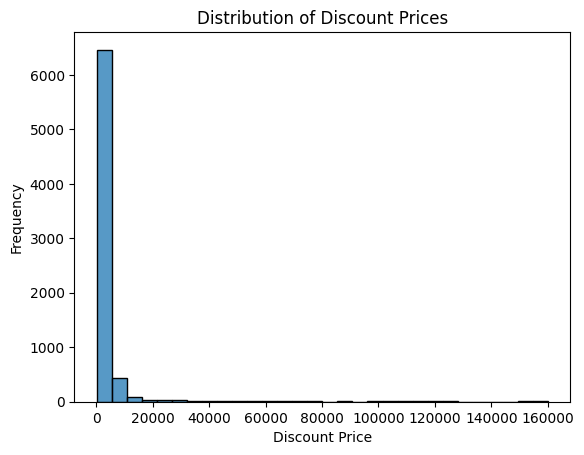

In [658]:
# Histogram to show the distribution of prices
sns.histplot(x='Discount_price', data=df, bins=30)
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()

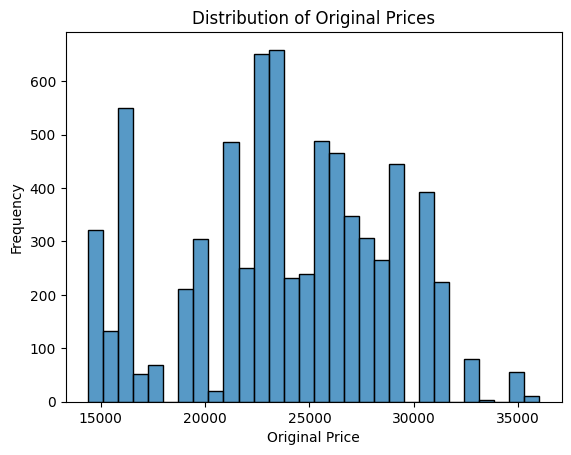

In [659]:
# Histogram to show the distribution of prices
sns.histplot(x='Orignal_price', data=df, bins=30)
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.show()


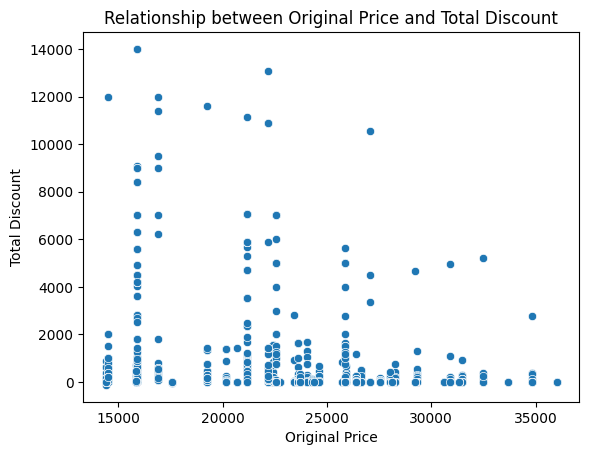

In [660]:
# Scatter plot to show the relationship between original price and discount
sns.scatterplot(x='Orignal_price', y='Total_discount', data=df)
plt.title('Relationship between Original Price and Total Discount')
plt.xlabel('Original Price')
plt.ylabel('Total Discount')
plt.show()


In [661]:
# pip install folium

In [662]:
# import folium

# # Get the unique addresses
# addresses = df['Customer_address'].unique()

# # Create a map centered at the first address in the dataset
# map_center = folium.Map(location=[df['Latitude'][0], df['Longitude'][0]], zoom_start=10)

# # Add markers for each address to the map
# for address in addresses:
#     # Get the lat/long coordinates for the address
#     location = df[df['Customer_address'] == address][['Latitude', 'Longitude']].iloc[0]
#     # Add the marker to the map
#     folium.Marker(location=[location[0], location[1]], popup=address).add_to(map_center)

# # Save the map as an HTML file
# map_center.save('map.html')

In [663]:
# # Get unique addresses
# addresses = df['Customer_address'].unique()

# # Create a map centered at the first address in the dataset
# map_center = folium.Map(location=[df['Latitude'][0], df['Longitude'][0]], zoom_start=10)

# # Add markers for each address to the map
# for address in addresses:
#     lat = df[df['Customer_address']==address]['Latitude'].values[0]
#     long = df[df['Customer_address']==address]['Longitude'].values[0]
#     popup_text = folium.Popup(address, parse_html=True)
#     folium.Marker(location=[lat, long], popup=popup_text).add_to(map_center)

# # Display the map
# map_center

In [664]:
# pip install geopy

In [665]:
# from geopy.geocoders import Nominatim

# # Create geolocator object
# geolocator = Nominatim(user_agent="my_app", timeout=10)

# # Define a function to get latitude and longitude from an address
# def get_location(address):
#     location = geolocator.geocode(address)
#     if location:
#         return location.latitude, location.longitude
#     else:
#         return None, None

# # Apply the function to the Customer_address column and create new columns for latitude and longitude
# df['Latitude'], df['Longitude'] = zip(*df['Customer_address'].apply(get_location))

In [666]:
num_customers = len(df['Customer_name'].unique())

print(f"Number of unique customers: {num_customers}")

Number of unique customers: 214


In [667]:
# num_customers = len(df['Customer_name_encoded'].unique())

# print(f"Number of unique customers: {num_customers}")

In [668]:
df.head(15)

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500,10,1450.000000,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250,10,1925.000000,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.000000,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.000000,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.000000,100.0,9,Low,1
5,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.000000,75.0,9,Low,1
6,6,2021-09-11,6544,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150,0,4,0,1240,72,279.861111,0.0,9,Low,0
7,6,2021-09-11,6544,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425,0,6,0,2070,72,311.458333,0.0,9,Low,0
8,6,2021-09-11,6544,CHATRAL,CAMPUS,1762,DEEN'S PIZZA CHEESE 200GM,24050,0,2,0,740,72,334.027778,0.0,9,Low,0
9,6,2021-09-11,6544,CHATRAL,CAMPUS,1763,DEEN'S SLICE CHEESE 200GM,23600,0,2,0,590,80,295.000000,0.0,9,Low,0


In [669]:
print(df["Discount_price"].min())
print(df["Discount_price"].max())

295
160000


In [670]:
min_rows = df.nsmallest(2, ['Discount_price'])

# Print the resulting dataframe
print(min_rows)

     No       Date  C/code  Customer_name Customer_address  Item_code  \
92   36 2021-09-14    2132  FREE SAMPLING       MOHMAD ZAI       1763   
192  81 2021-09-21    9556      EASY MART    ZANGAL MARKET       1763   

                  Product_name  Orignal_price  CTN  PCS  Total_discount  \
92   DEEN'S SLICE CHEESE 200GM          23600    0    1               0   
192  DEEN'S SLICE CHEESE 200GM          23600    0    1               0   

     Discount_price  PCS_in_CTN  Price_per_PCS  Discount_per_piece  Month  \
92              295          80          295.0                 0.0      9   
192             295          80          295.0                 0.0      9   

    Price Range  Has_Discount  
92          Low             0  
192         Low             0  


Number of rows above 150000 in Orignal_price: 13


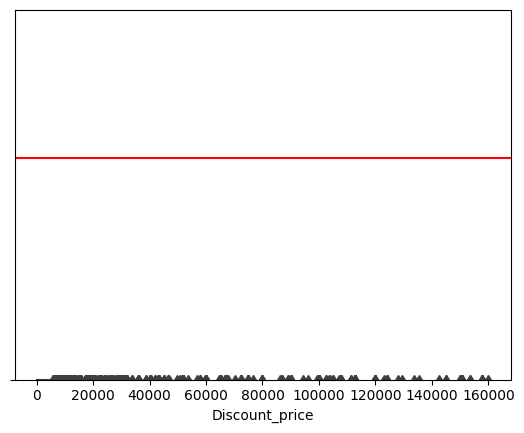

In [671]:
# Create a boxplot of the 'Orignal_price' column
sns.boxplot(x=df['Discount_price'])

# Set y-axis limit to 250000
plt.ylim(0, 250000)

# Add a horizontal line at y=150000
plt.axhline(y=150000, color='r', linestyle='-')

# Count the number of rows that have an Orignal_price value above 150000
above_threshold = (df['Discount_price'] > 150000).sum()
print(f"Number of rows above 150000 in Orignal_price: {above_threshold}")

In [672]:
count_above_150000 = df[df['Discount_price'] > 150000]['Discount_price'].count()
print(count_above_150000)

13


In [673]:
# sns.distplot(df["Discount_price"])

In [674]:
# sns.distplot(np.log(df["Discount_price"]))

In [675]:
df.head()

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500,10,1450.0,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250,10,1925.0,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.0,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.0,100.0,9,Low,1


In [676]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [677]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [678]:
X = df.drop(columns=['Customer_name'])
y = (df['Customer_name'])

In [679]:
X = df[["Product_name", "PCS",  "Orignal_price", "Total_discount", "Has_Discount"]]
y = df['C/code']

In [680]:
df.head(8)

,No,Date,C/code,Customer_name,Customer_address,Item_code,Product_name,Orignal_price,CTN,PCS,Total_discount,Discount_price,PCS_in_CTN,Price_per_PCS,Discount_per_piece,Month,Price Range,Has_Discount
0,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,1,10,1000,13500,10,1450.000000,100.0,9,Low,1
1,3,2021-09-10,9295,BIG BITE FAST FOOD,WARSAK ROAD,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,5,375,9250,10,1925.000000,75.0,9,Low,1
2,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.000000,100.0,9,Low,1
3,4,2021-09-10,8992,PIZZA FLAME,IBRAHIM MARKET,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.000000,75.0,9,Low,1
4,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1770,DEEN'S CHADDER CHEESE BLOCK 2K,14500,0,2,200,2700,10,1450.000000,100.0,9,Low,1
5,5,2021-09-10,9903,CHIL & GRILL 0312.9553655,MOHMAD ZAI,1771,DEEN'S MOZRELLA CHEESE BLOCK,19250,0,2,150,3700,10,1925.000000,75.0,9,Low,1
6,6,2021-09-11,6544,CHATRAL,CAMPUS,1758,DEEN'S CHEDDAR 200GM,20150,0,4,0,1240,72,279.861111,0.0,9,Low,0
7,6,2021-09-11,6544,CHATRAL,CAMPUS,1760,DEEN'S MOZARELLA 200GM,22425,0,6,0,2070,72,311.458333,0.0,9,Low,0


In [681]:
X

,Product_name,PCS,Orignal_price,Total_discount,Has_Discount
0,DEEN'S CHADDER CHEESE BLOCK 2K,10,14500,1000,1
1,DEEN'S MOZRELLA CHEESE BLOCK,5,19250,375,1
2,DEEN'S CHADDER CHEESE BLOCK 2K,2,14500,200,1
3,DEEN'S MOZRELLA CHEESE BLOCK,2,19250,150,1
4,DEEN'S CHADDER CHEESE BLOCK 2K,2,14500,200,1
...,...,...,...,...,...
7290,DEEN'S MOZRELLA CHEESE BLOCK,3,25850,0,0
7291,DEEN'S MOZRELLA CHEESE BLOCK,2,25850,0,0
7292,DEEN'S CHADDER CHEESE BLOCK 2K,2,22550,0,0
7293,DEENS SLICE 250G,2,28116,0,0


In [682]:
y

0       9295
1       9295
2       8992
3       8992
4       9903
        ... 
7290    9947
7291    3445
7292    3445
7293    3467
7294    9031
Name: C/code, Length: 7263, dtype: int64

In [683]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [684]:
X_train

,Product_name,PCS,Orignal_price,Total_discount,Has_Discount
5959,DEEN'S CHEDDAR 200GM,2,26390,0,0
2917,DEEN'S CHADDER CHEESE BLOCK 2K,1,15900,90,1
6550,DEEN'S CHEDDAR 200GM,1,26390,0,0
7020,DEEN'S PIZZA CHEESE 200GM,3,34848,396,1
482,DEEN'S SLICE CHEESE 200GM,2,23600,0,0
...,...,...,...,...,...
6462,DEEN'S CHEDDAR 200GM,6,26390,0,0
3614,DEEN'S PIZZA CHEESE 200GM,1,28275,0,0
5715,DEEN'S PIZZA CHEESE 200GM,4,31460,0,0
6657,DEEN'S CHADDER CHEESE BLOCK 2K,3,22550,0,0


In [685]:
from sklearn.ensemble import RandomForestClassifier

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0])
],remainder='passthrough')

step2 = RandomForestClassifier()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

accuracy = pipe.score(X_test, y_test)
print("Accuracy:", accuracy)

R2 score -0.4203513090778923
MAE 2640.308256880734
Accuracy: 0.22752293577981653


In [691]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define X and y
X = df[["Date", "Item_code", "PCS"]]
y = df['C/code']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [687]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the X and y variables
X = df[['Item_code', 'PCS', 'Discount_price', 'Total_discount', 'Month']]
y = df['Customer_name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.20853406744666209


In [688]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define X and y
X = df[['Item_code', 'PCS', 'Discount_price', 'Total_discount', 'Month']]
y = df['Customer_name']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2112869924294563


In [689]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Customer_name' column
df['Customer_name_encoded'] = le.fit_transform(df['Customer_name'])

# Scale the numerical features
X = df.drop(['Customer_name', 'Total_cost'], axis=1) # Drop the categorical column and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

KeyError: "['Total_cost'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

# Encode the target variable
le = LabelEncoder()
df['Customer_name_encoded'] = le.fit_transform(df['Customer_name'])

# Define X and y
X = df[["Item_code", "Orignal_price", "CTN", "PCS", "Total_discount", "Discount_price", "PCS_in_CTN", "Price_per_PCS", "Discount_per_piece", "Month", "Has_Discount"]]
y = df['Customer_name']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['C/code', 'Customer_address']], df['Customer_name_encoded'], test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, alpha=0.0001,
                      solver='adam', verbose=10,  random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Predict the target variable on new data
new_data = pd.DataFrame({'C/code': ['A1', 'B2'], 'Customer_address': ['123 Main St', '456 Elm St']})
new_data_scaled = scaler.transform(new_data)
predicted_customer_names = le.inverse_transform(model.predict(new_data_scaled))
print("Predicted Customer Names:", predicted_customer_names)

ValueError: could not convert string to float: 'ZAHID MARKET'

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assume X is a pandas dataframe containing the features
# and y is a pandas series containing the target variable
# Encode the categorical variable 'Month'
le = LabelEncoder()
X['Month'] = le.fit_transform(X['Month'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
clf = SVC(kernel='linear', C=1)
clf.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = clf.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.1624225739848589


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# # Split the data into training and test sets
# X = df[['Item_code', 'PCS', 'Orignal_price', 'Total_discount', 'Month']]
# y = df['Customer_name']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature selection pipeline
# kbest = SelectKBest(score_func=f_classif)
# scaler = StandardScaler()
# svm = SVC()
# pipeline = Pipeline(steps=[('kbest', kbest), ('scaler', scaler), ('svm', svm)])

# # Parameter grid for hyperparameter tuning
# param_grid = {
#     'kbest__k': [1, 2, 3, 4, 'all'],
#     'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__C': [0.1, 1, 10],
#     'svm__gamma': [0.01, 0.1, 1, 'scale', 'auto']
# }

# # Grid search for hyperparameter tuning
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Evaluate the model
# print("Best parameters: ", grid_search.best_params_)
# print("Training accuracy: ", grid_search.best_score_)
# print("Test accuracy: ", grid_search.score(X_test, y_test))